In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/glass.data.txt', sep=",", header=None)
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [3]:
data.shape

(214, 11)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.groupby(10).count()[0]

10
1    70
2    76
3    17
5    13
6     9
7    29
Name: 0, dtype: int64

In [6]:
X = data.iloc[:,1:-1]
X.shape

(214, 9)

In [7]:
X.head()

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [8]:
y = data[10]
y = np.array(y)
y.shape

(214,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
list_k = []
list_acc = []
for K_value in range(2, int(y_train.shape[0]**0.5)):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors=K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100
    list_acc.append(acc)
    print('k = ', K_value, ': Accuracy is ', accuracy_score(y_test, y_pred))

k =  2 : Accuracy is  0.7230769230769231
k =  3 : Accuracy is  0.7230769230769231
k =  4 : Accuracy is  0.7384615384615385
k =  5 : Accuracy is  0.7384615384615385
k =  6 : Accuracy is  0.7384615384615385
k =  7 : Accuracy is  0.7384615384615385
k =  8 : Accuracy is  0.6923076923076923
k =  9 : Accuracy is  0.7230769230769231
k =  10 : Accuracy is  0.6923076923076923
k =  11 : Accuracy is  0.7076923076923077


In [11]:
position = list_acc.index(max(list_acc))
position

2

In [12]:
k = list_k[position]
print('The optimal number of neighbors is', k, 'with', list_acc[position])

The optimal number of neighbors is 4 with 73.84615384615385


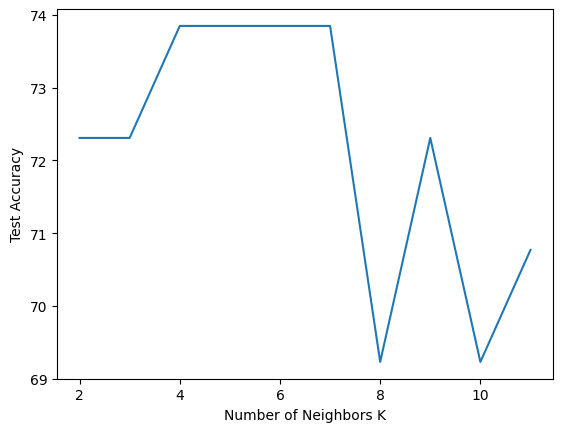

In [13]:
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [14]:
for i in range (4,8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print('k=',i,': The Train prediction accuracy is: ',
          knn.score(X_train, y_train)*100,'%')
    print('------ The Test prediction accuracy is: ',
          knn.score(X_test,y_test)*100,'%')

k= 4 : The Train prediction accuracy is:  76.51006711409396 %
------ The Test prediction accuracy is:  73.84615384615385 %
k= 5 : The Train prediction accuracy is:  72.48322147651007 %
------ The Test prediction accuracy is:  73.84615384615385 %
k= 6 : The Train prediction accuracy is:  71.14093959731544 %
------ The Test prediction accuracy is:  73.84615384615385 %
k= 7 : The Train prediction accuracy is:  66.44295302013423 %
------ The Test prediction accuracy is:  73.84615384615385 %


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [16]:
print('The Train prediction accuracy is: ', knn.score(X_train, y_train)*100,'%')
print('The Test prediction accuracy is: ', knn.score(X_test, y_test)*100,'%')

The Train prediction accuracy is:  72.48322147651007 %
The Test prediction accuracy is:  73.84615384615385 %


In [17]:
y_pred = knn.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test)[0].values,
                'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,2,5
1,7,7
2,2,2
3,2,2
4,1,1


In [19]:
confusion_matrix(y_test, y_pred)

array([[22,  3,  0,  0,  0,  0],
       [ 3, 15,  0,  2,  1,  0],
       [ 6,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  8]])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.88      0.77        25
           2       0.79      0.71      0.75        21
           3       0.00      0.00      0.00         7
           5       0.50      1.00      0.67         2
           6       0.50      1.00      0.67         1
           7       1.00      0.89      0.94         9

    accuracy                           0.74        65
   macro avg       0.58      0.75      0.63        65
weighted avg       0.68      0.74      0.70        65



> Model still has low accuracy, especially for some classes which have precision below 0.5 because they have few classes (imbalance data).

##### Feature Selection

In [21]:
data_sub = data.iloc[:,1:]
corrmat = data_sub.corr()
top_corr_features = corrmat.index
top_corr_features

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [22]:
corrmat

,1,2,3,4,5,6,7,8,9,10
1,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
2,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
3,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
4,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
5,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
6,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
7,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
8,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
9,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
10,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


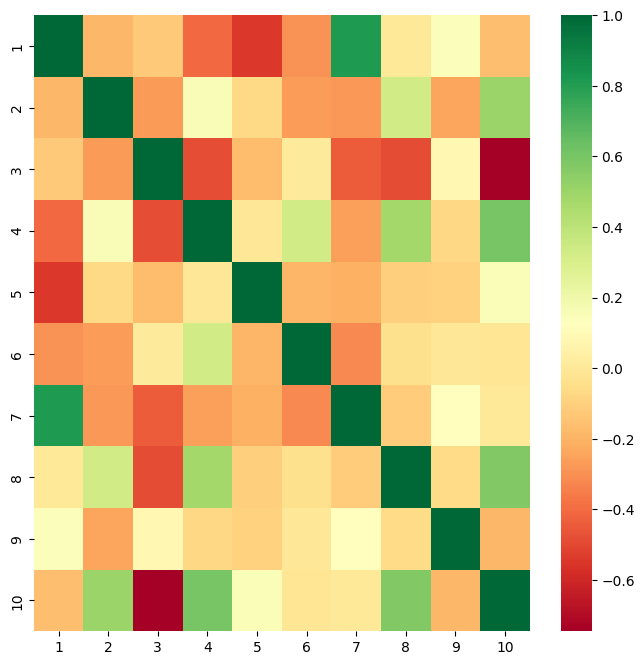

In [23]:
plt.figure(figsize=(8,8))
g = sns.heatmap(data[top_corr_features].corr(), cmap='RdYlGn')

> 2,3,4,8 have high correlation

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [25]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(9,'Score'))

   Specs       Score
7      8  145.514077
2      3  100.984212
5      6   31.670632
3      4   16.977488
1      2    4.311253
6      7    3.210929
8      9    2.170185
4      5    0.110449
0      1    0.000048


> 8,3,6,4,2 have high correlation

##### Resampling

In [26]:
rus = SMOTE()
X_resampled, y_resampled = rus.fit_resample(X, y)

In [27]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print('Frequency of each category:')
print(np.asarray((unique_elements, counts_elements)))

Frequency of each category:
[[ 1  2  3  5  6  7]
 [70 76 17 13  9 29]]


In [28]:
unique_elements, counts_elements = np.unique(y_resampled, return_counts=True)
print('Frequency of each category:')
print(np.asarray((unique_elements, counts_elements)))

Frequency of each category:
[[ 1  2  3  5  6  7]
 [76 76 76 76 76 76]]


In [29]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [30]:
list_k = []
list_acc = []
for K_value in range(2, int(y_train_r.shape[0]**0.5)):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors=K_value)
    neigh.fit(X_train_r, y_train_r)
    y_pred_r = neigh.predict(X_test_r)
    acc = accuracy_score(y_test_r, y_pred_r)*100
    list_acc.append(acc)
    print('k = ', K_value, ': Accuracy is ', accuracy_score(y_test_r, y_pred_r))

k =  2 : Accuracy is  0.8394160583941606
k =  3 : Accuracy is  0.8321167883211679
k =  4 : Accuracy is  0.8321167883211679
k =  5 : Accuracy is  0.8175182481751825
k =  6 : Accuracy is  0.8102189781021898
k =  7 : Accuracy is  0.8175182481751825
k =  8 : Accuracy is  0.8029197080291971
k =  9 : Accuracy is  0.8029197080291971
k =  10 : Accuracy is  0.8248175182481752
k =  11 : Accuracy is  0.7956204379562044
k =  12 : Accuracy is  0.8102189781021898
k =  13 : Accuracy is  0.7883211678832117
k =  14 : Accuracy is  0.8029197080291971
k =  15 : Accuracy is  0.781021897810219
k =  16 : Accuracy is  0.7883211678832117


In [31]:
position = list_acc.index(max(list_acc))
position

0

In [32]:
k = list_k[position]
print('The optimal number of neighbors is', k, 'with', list_acc[position])

The optimal number of neighbors is 2 with 83.94160583941606


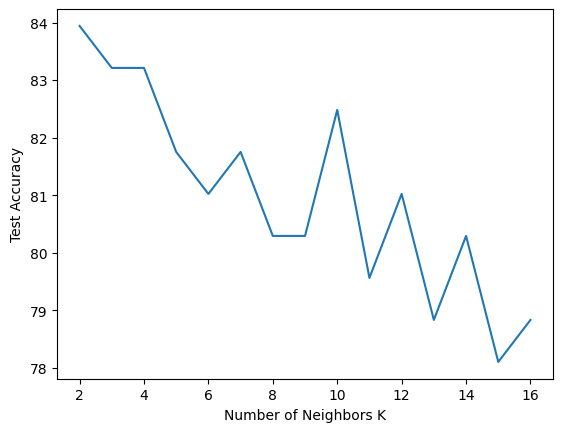

In [33]:
plt.plot(list_k, list_acc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_r, y_train_r)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",2
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [35]:
print('The Train prediction accuracy is: ', knn.score(X_train_r, y_train_r)*100,'%')
print('The Test prediction accuracy is: ', knn.score(X_test_r, y_test_r)*100,'%')

The Train prediction accuracy is:  94.04388714733543 %
The Test prediction accuracy is:  83.94160583941606 %


In [36]:
y_pred_r = knn.predict(X_test_r)

In [37]:
confusion_matrix(y_test_r, y_pred_r)

array([[17,  2,  3,  0,  0,  0],
       [ 2, 14,  2,  0,  0,  0],
       [ 6,  0, 17,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0],
       [ 0,  0,  0,  0, 18,  0],
       [ 1,  3,  0,  2,  0, 21]])

In [38]:
print(classification_report(y_test_r, y_pred_r))

              precision    recall  f1-score   support

           1       0.65      0.77      0.71        22
           2       0.74      0.78      0.76        18
           3       0.74      0.74      0.74        23
           5       0.93      0.97      0.95        29
           6       1.00      1.00      1.00        18
           7       1.00      0.78      0.88        27

    accuracy                           0.84       137
   macro avg       0.84      0.84      0.84       137
weighted avg       0.85      0.84      0.84       137



> After doing resampling, the accuracy improved.